In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm

ImportError: this version of pandas is incompatible with numpy < 1.17.3
your numpy version is 1.16.5.
Please upgrade numpy to >= 1.17.3 to use this pandas version

In [4]:
print(numpy.__version__)

NameError: name 'numpy' is not defined

In [4]:
os.chdir(r'C:\Users\NORRIKA\OneDrive - Key Corp\Documents\Project')

In [5]:
data = pd.read_csv(r'C:\Users\NORRIKA\OneDrive - Key Corp\Documents\Project\BondSignalData.csv')

In [6]:
data['rqdatetime'] = pd.to_datetime(data.request_time)
data['rqdatetime'].dt.date
data['rfqdate']=data['rqdatetime'].dt.date
data['year']=pd.to_datetime(data.request_time).dt.year
data['month']=data.rqdatetime.dt.month
data['day']=pd.to_datetime(data.request_time).dt.day
data['hour']=pd.to_datetime(data.request_time).dt.hour
data['minute']=pd.to_datetime(data.request_time).dt.minute
data['day']= data['day'].apply(lambda x: '{0:0>2}'.format(x)) #turning day to two digits so 1-04 comes before 1-11
data['month_day']= (data['month'].astype(str) + "-" + data['day'].astype(str)) #putting month & day together
data['month'] = data['month'].replace(4, 3)
data['bondlength'] = data.mat_bucket.str.strip("B")
data['bondlength']=data.bondlength.astype(int)

In [10]:
bins = [-1.25, -0.75, 0.75, 1.25]
data['binnedsig3'] = pd.cut(data['signal3'], bins, labels = [1,2,3])
#print(data)
data.head()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,rfqdate,year,month,day,hour,minute,month_day,bondlength,fin_binary,binnedsig3
0,1/4/2021 8:32,594918BY9,3000,170,B05,Technology,MSFT,0.139226,-1.705008,0.000000,...,2021-01-04,2021,1,04,8,32,1-04,5,0,3
1,1/4/2021 12:58,37331NAK7,50,558,B10,Basic Materials,GP,0.169077,0.622054,0.790123,...,2021-01-04,2021,1,04,12,58,1-04,10,0,2
2,1/4/2021 12:58,37331NAK7,50,558,B10,Basic Materials,GP,0.169077,0.622054,0.790123,...,2021-01-04,2021,1,04,12,58,1-04,10,0,2
3,1/4/2021 13:07,500255AU8,50,347,B05,Consumer Cyclical,KSS,-1.917058,-2.578685,0.085106,...,2021-01-04,2021,1,04,13,7,1-04,5,0,1
4,1/4/2021 13:14,594918BY9,80,170,B05,Technology,MSFT,0.190731,-1.134894,-0.708861,...,2021-01-04,2021,1,04,13,14,1-04,5,0,2


In [97]:
data['binnedsig3_binary'] = data['binnedsig3'].apply(lambda x: 1 if x == 2 else 0)
data['binnedsig3_binary']

0        0
1        1
2        1
3        0
4        1
        ..
12494    1
12495    0
12496    1
12497    1
12498    0
Name: binnedsig3_binary, Length: 12499, dtype: int64

In [98]:
data['fin_binary'] = data['industrySector'].apply(lambda x: 1 if x == 'Financial' else 0)
data['fin_binary']

0        0
1        0
2        0
3        0
4        0
        ..
12494    0
12495    0
12496    0
12497    0
12498    1
Name: fin_binary, Length: 12499, dtype: int64

# Trees

In [13]:
clf = DecisionTreeRegressor(max_depth=3)
x = data[['quantity_bonds', 'liq_score','fin_binary', 'binnedsig3_binary', 'bondlength']]
y = data['move_1D']

In [14]:
x

,quantity_bonds,liq_score,fin_binary,binnedsig3_binary,bondlength
0,3000,170,0,0,5
1,50,558,0,1,10
2,50,558,0,1,10
3,50,347,0,0,5
4,80,170,0,1,5
...,...,...,...,...,...
12494,1340,47,0,1,30
12495,118,13,0,0,10
12496,10,49,0,1,30
12497,130,181,0,1,10


In [15]:
clf.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [16]:
y_pred = clf.predict(x)

In [17]:
mse = mean_squared_error(y, y_pred)
rmse = math.sqrt(mse)
rmse

0.9638906484236022

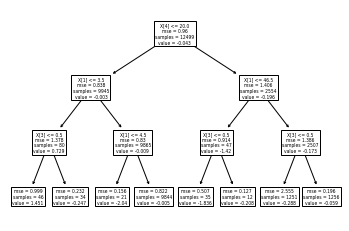

In [18]:
tree.plot_tree(clf)
plt.rcParams["figure.figsize"]=15,15
plt.show()

In [36]:
data['tree_prediction'] = clf.predict(data[['quantity_bonds', 'liq_score','fin_binary', 'binnedsig3_binary', 'bondlength']])

In [43]:
data.groupby(['tree_prediction']).count()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,month_day,bondlength,binnedsig3,binnedsig3_binary,fin_binary,binnedliq_score,sig3equal1,sig3equalneg1,binnedmat_bucket,binnedquantity_bonds
tree_prediction,,,,,,,,,,,,,,,,,,,,,
-2.040467,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
-1.836238,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
-0.287829,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,...,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251
-0.247330,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
-0.207775,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
-0.058879,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
-0.004748,9844,9844,9844,9844,9844,9844,9844,9844,9844,9844,...,9844,9844,9844,9844,9844,9844,9844,9844,9844,9844
1.450660,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46


## is this tree important ? --playing around with a second tree & variables

In [31]:
clf2 = DecisionTreeRegressor(max_depth=3)
x = data[['binnedliq_score', 'bondlength','signal3', 'sig3equal1', 'sig3equalneg1']]
y = data['move_1D']

In [32]:
clf2.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [33]:
y_pred = clf2.predict(x)

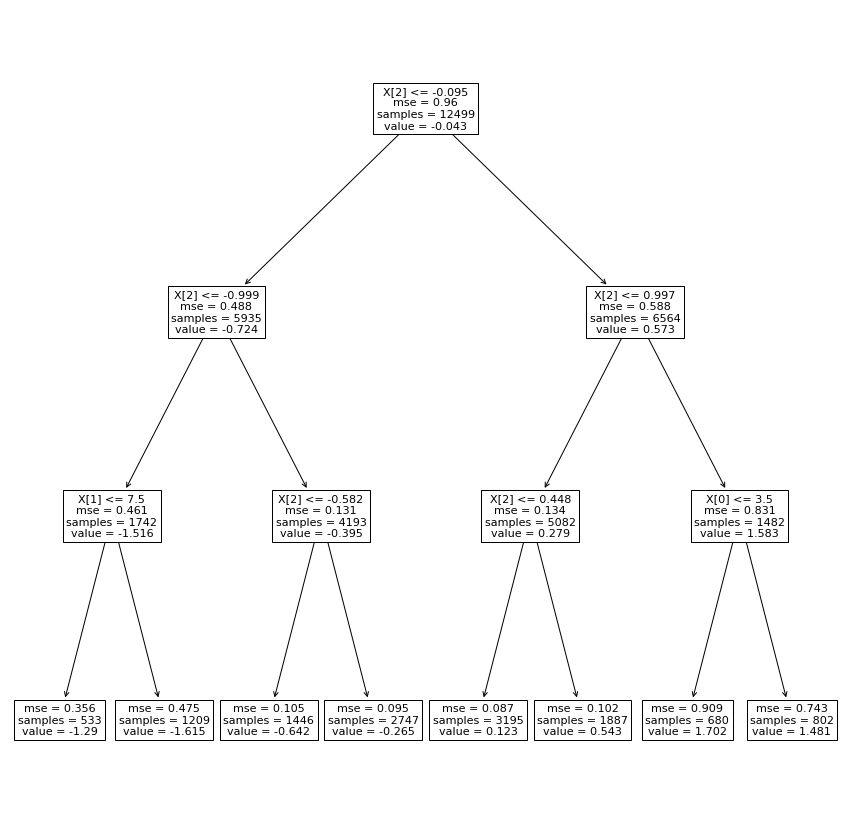

In [34]:
tree.plot_tree(clf2)
plt.rcParams["figure.figsize"]=15,15
plt.show()

In [38]:
data['tree_prediction2'] = clf2.predict(data[['binnedliq_score', 'bondlength','signal3', 'sig3equal1', 'sig3equalneg1']])

In [41]:
data.groupby('tree_prediction2').count()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,month_day,bondlength,fin_binary,binnedsig3,binnedsig3_binary,binnedmat_bucket,sig3equal1,sig3equalneg1,binnedliq_score,tree_prediction
tree_prediction2,,,,,,,,,,,,,,,,,,,,,
-1.615332,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,...,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209
-1.290004,533,533,533,533,533,533,533,533,533,533,...,533,533,533,533,533,533,533,533,533,533
-0.641608,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446,...,1446,1446,1446,1446,1446,1446,1446,1446,1446,1446
-0.264608,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,...,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
0.123070,3195,3195,3195,3195,3195,3195,3195,3195,3195,3195,...,3195,3195,3195,3195,3195,3195,3195,3195,3195,3195
0.542958,1887,1887,1887,1887,1887,1887,1887,1887,1887,1887,...,1887,1887,1887,1887,1887,1887,1887,1887,1887,1887
1.481312,802,802,802,802,802,802,802,802,802,802,...,802,802,802,802,802,802,802,802,802,802
1.701928,680,680,680,680,680,680,680,680,680,680,...,680,680,680,680,680,680,680,680,680,680


In [ ]:
train test split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [43]:
def k_Fold_Split(data, n_splits, shuffle, random_state, verbose=False):
    # Creating k-fold splitting 
    kfold = KFold(n_splits, shuffle, random_state)
    sizes = [0 , 0]
    for train, test in kfold.split(data):
        if verbose:
            print('train: indexes %s, val: indexes %s, size (training) %d, (val) %d' % (train, test, train.shape[0], test.shape[0]))
        sizes[0] += train.shape[0]
        sizes[1] += test.shape[0]
        
    return int(sizes[0] /n_splits), int(sizes[1]/n_splits)

In [44]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
cv_strategy = LeaveOneOut()
# cross_val_score will evaluate the model 
scores = cross_val_score(clf, x, y, scoring='accuracy', cv=cv_strategy, n_jobs=-1)

ValueError: continuous is not supported

# BUCKETS

### BINNING LIQUIDITY SCORE BASED ON QCUT

In [27]:
data['binnedliq_score']= pd.qcut(data['liq_score'], q=8)

In [28]:
data['binnedliq_score']

0           (12.0, 182.0]
1          (399.0, 719.0]
2          (399.0, 719.0]
3          (182.0, 399.0]
4           (12.0, 182.0]
               ...       
12494       (12.0, 182.0]
12495       (12.0, 182.0]
12496       (12.0, 182.0]
12497       (12.0, 182.0]
12498    (1394.0, 2087.0]
Name: binnedliq_score, Length: 12499, dtype: category
Categories (8, interval[float64]): [(2.999, 12.0] < (12.0, 182.0] < (182.0, 399.0] < (399.0, 719.0] < (719.0, 1065.0] < (1065.0, 1394.0] < (1394.0, 2087.0] < (2087.0, 3000.0]]

In [29]:
data['binnedliq_score']= pd.qcut(data['liq_score'], q=8, labels=[1,2,3,4,5,6,7,8])

In [30]:
data.groupby(['binnedliq_score']).count()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,hour,minute,month_day,bondlength,fin_binary,binnedsig3,binnedsig3_binary,binnedmat_bucket,sig3equal1,sig3equalneg1
binnedliq_score,,,,,,,,,,,,,,,,,,,,,
1,1587,1587,1587,1587,1587,1587,1587,1587,1587,1587,...,1587,1587,1587,1587,1587,1587,1587,1587,1587,1587
2,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,...,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540
3,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,...,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565
4,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560,...,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560
5,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563,...,1563,1563,1563,1563,1563,1563,1563,1563,1563,1563
6,1570,1570,1570,1570,1570,1570,1570,1570,1570,1570,...,1570,1570,1570,1570,1570,1570,1570,1570,1570,1570
7,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553,...,1553,1553,1553,1553,1553,1553,1553,1553,1553,1553
8,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561,...,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561


### BINNING MAT BUCKET BASED ON QCUT 

In [24]:
data['binnedmat_bucket']= pd.qcut(data['bondlength'], q=4,  labels=['2-3 years', '5 years', '10 years', '30 years'])

In [25]:
data.groupby(['binnedmat_bucket']).count()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,year,month,day,hour,minute,month_day,bondlength,fin_binary,binnedsig3,binnedsig3_binary
binnedmat_bucket,,,,,,,,,,,,,,,,,,,,,
2-3 years,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,...,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590
5 years,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,...,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
10 years,3684,3684,3684,3684,3684,3684,3684,3684,3684,3684,...,3684,3684,3684,3684,3684,3684,3684,3684,3684,3684
30 years,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554,...,2554,2554,2554,2554,2554,2554,2554,2554,2554,2554


### BINNING BOND QUANTITY BASED ON QCUT

In [55]:
data['binnedquantity_bonds']= pd.qcut(data['quantity_bonds'], q=5, labels=['1-12', '12-50', '50-210', '210-600', '600-3000'])

In [56]:
data.groupby(['binnedquantity_bonds']).count()

,request_time,cusip,quantity_bonds,liq_score,mat_bucket,industrySector,ticker,move_1D,move_3D,signal1,...,bondlength,fin_binary,binnedsig3,binnedsig3_binary,binnedmat_bucket,sig3equal1,sig3equalneg1,binnedliq_score,tree_prediction,tree_prediction2
binnedquantity_bonds,,,,,,,,,,,,,,,,,,,,,
1-12,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504,...,2504,2504,2504,2504,2504,2504,2504,2504,2504,2504
12-50,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,...,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536
50-210,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461,...,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461
210-600,2502,2502,2502,2502,2502,2502,2502,2502,2502,2502,...,2502,2502,2502,2502,2502,2502,2502,2502,2502,2502
600-3000,2496,2496,2496,2496,2496,2496,2496,2496,2496,2496,...,2496,2496,2496,2496,2496,2496,2496,2496,2496,2496


# obtained best possible model

In [99]:
data['sig3equal1'] = data['signal3'].apply(lambda x: 1 if x >= 1 else 0)
data['sig3equalneg1'] = data['signal3'].apply(lambda x: 1 if x <= -1 else 0)

In [25]:
x = data[['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.365e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:13:02   Log-Likelihood:                -8400.5
No. Observations:               12499   AIC:                         1.681e+04
Df Residuals:                   12495   BIC:                         1.684e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0090      0.005     -1.826

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
model.params[0] #=constant from regression so can use in plotting later

-0.008984883218787196

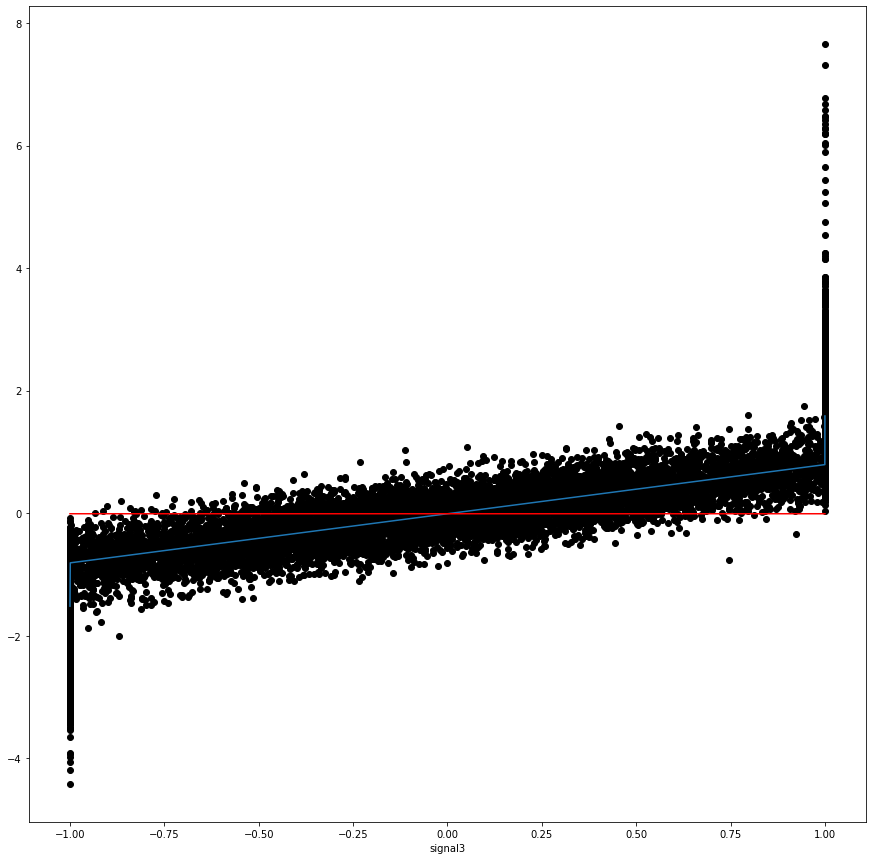

In [27]:
sns.lineplot(x = data['signal3'], y=predictions)
sns.lineplot(x = data['signal3'], y=model.params[0], color = 'red')
plt.scatter(data['signal3'],data['move_1D'], color = 'black')

# now using model with buckets

In [76]:
#most liquid, most traded, r-squared means what?? about 83.5% of the variation in move_1D can be explained by signal3

### Liquidity Score

In [45]:
x = data[data['binnedliq_score']==1][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedliq_score']==1]['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2661.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:56:27   Log-Likelihood:                -1160.4
No. Observations:                1587   AIC:                             2329.
Df Residuals:                    1583   BIC:                             2350.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0048      0.016      0.299

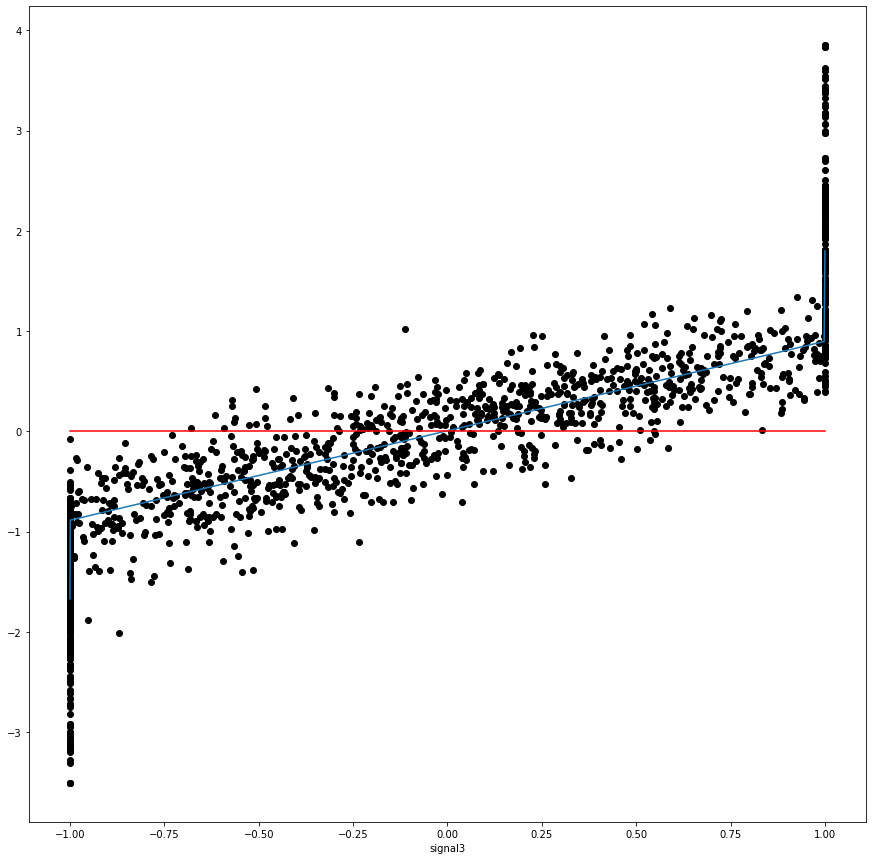

In [488]:
sns.lineplot(x = data[data['binnedliq_score']==1]['signal3'], y= predictions)
sns.lineplot(x =  data[data['binnedliq_score']==1]['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedliq_score']==1]['signal3'],data[data['binnedliq_score']==1]['move_1D'], color = 'black')

In [ ]:
#middle of the road liquidity score

In [489]:
x = data[data['binnedliq_score']==4][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedliq_score']==4]['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1675.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:22:32   Log-Likelihood:                -695.55
No. Observations:                1560   AIC:                             1399.
Df Residuals:                    1556   BIC:                             1421.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0031      0.011     -0.289

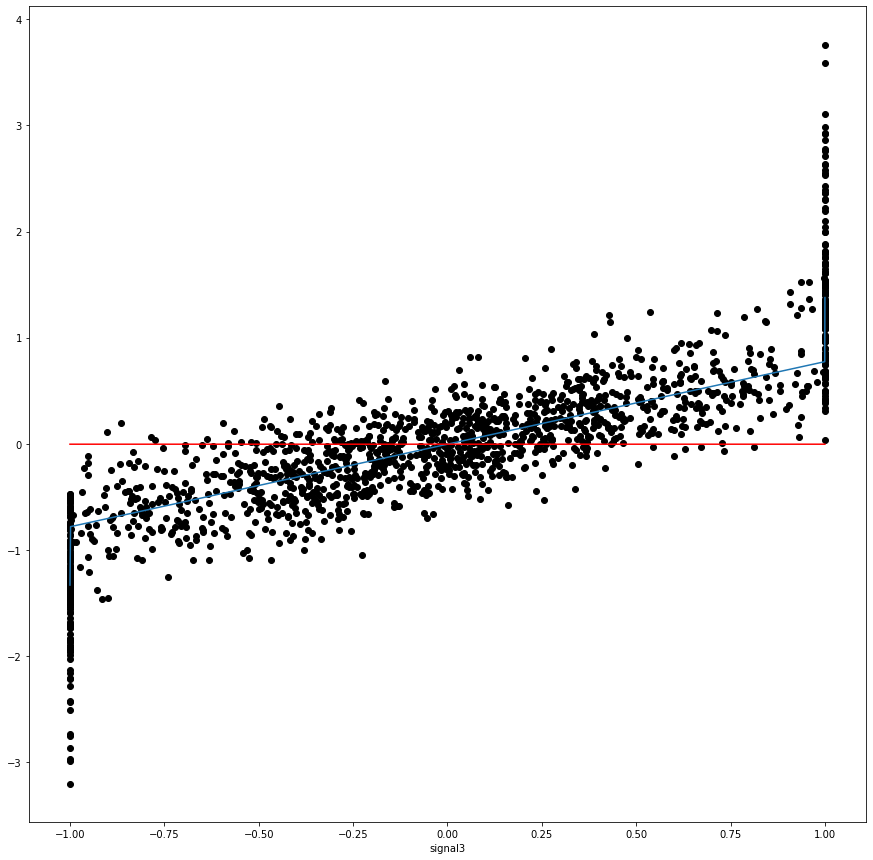

In [490]:
sns.lineplot(x = data[data['binnedliq_score']==4]['signal3'], y= predictions)
sns.lineplot(x =  data[data['binnedliq_score']==4]['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedliq_score']==4]['signal3'],data[data['binnedliq_score']==4]['move_1D'], color = 'black')

In [77]:
#least liquid, as R squared goes down

In [491]:
x = data[data['binnedliq_score']==8][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedliq_score']==8]['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1447.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:24:11   Log-Likelihood:                -520.65
No. Observations:                1561   AIC:                             1049.
Df Residuals:                    1557   BIC:                             1071.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0320      0.009     -3.466

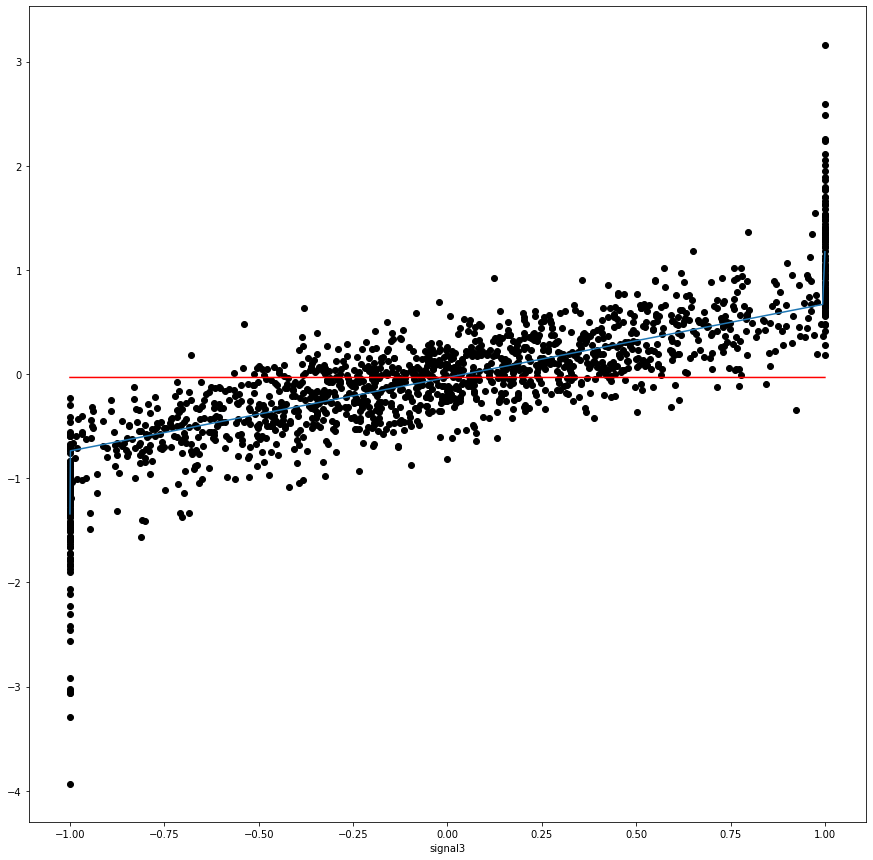

In [492]:
sns.lineplot(x = data[data['binnedliq_score']==8]['signal3'], y= predictions)
sns.lineplot(x =  data[data['binnedliq_score']==8]['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedliq_score']==8]['signal3'],data[data['binnedliq_score']==8]['move_1D'], color = 'black')

In [ ]:
#for loop that outputs coeff, confidence, overall fits, r-squared for each liquidity bucket

In [135]:
data['binnedliq_score']= pd.qcut(data['liq_score'], q=8, labels=[1,2,3,4,5,6,7,8])
labels=[1,2,3,4,5,6,7,8]
for i in labels:
    x = data[data['binnedliq_score']==i][['signal3', 'sig3equal1', 'sig3equalneg1']]
    y = data[data['binnedliq_score']==i]['move_1D']

    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    variable_coefs = model.params
    confidence_interval= model.conf_int(alpha=0.05)
    p_values= model.pvalues
    r_squared= model.rsquared
    print('bin', i,': R-squared =',r_squared)
    print('Coefficients','\n',variable_coefs, '\n')
    print('Pvalues', '\n', p_values, '\n')
    print('C.I.', '\n', confidence_interval, '\n\n')

bin 1 : R-squared = 0.8345067953772407
Coefficients 
 const            0.004813
signal3          0.892338
sig3equal1       0.902180
sig3equalneg1   -0.783716
dtype: float64 

Pvalues 
 const             7.652596e-01
signal3          8.579137e-158
sig3equal1        2.975407e-74
sig3equalneg1     1.996706e-69
dtype: float64 

C.I. 
                       0         1
const         -0.026798  0.036423
signal3        0.834194  0.950482
sig3equal1     0.810174  0.994186
sig3equalneg1 -0.866746 -0.700685 


bin 2 : R-squared = 0.8197547035274647
Coefficients 
 const           -0.006976
signal3          0.848763
sig3equal1       0.759071
sig3equalneg1   -0.838167
dtype: float64 

Pvalues 
 const             6.732600e-01
signal3          1.024850e-133
sig3equal1        3.428333e-50
sig3equalneg1     4.714629e-74
dtype: float64 

C.I. 
                       0         1
const         -0.039420  0.025468
signal3        0.787669  0.909857
sig3equal1     0.662730  0.855412
sig3equalneg1 -0.923636 -

combining LinReg into FOR loop to be able to see all important info obtained through LinReg model summary

In [78]:
data['binnedliq_score']= pd.qcut(data['liq_score'], q=8, labels=[1,2,3,4,5,6,7,8])
labels=[1,2,3,4,5,6,7,8]
for i in labels:
    x = data[data['binnedliq_score']==i][['signal3', 'sig3equal1', 'sig3equalneg1']]
    y = data[data['binnedliq_score']==i]['move_1D']

    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    
    variable_coefs = model.params
    confidence_interval= model.conf_int(alpha=0.05)
    p_values= model.pvalues
    r_squared= model.rsquared
    
    sub_df = pd.DataFrame()
    sub_df['features'] = ['const', 'signal3','sig3equal1', 'sig3equalneg1']
    sub_df.set_index('features', inplace=True)
    sub_df['coef'] = list(variable_coefs)
    sub_df['conf_a'] = list(confidence_interval[0])
    sub_df['conf_b'] = list(confidence_interval[1])
    sub_df['p_values'] = list(p_values)
    sub_df['r_squared'] = r_squared
    
    print('bin', i)
    print(sub_df)
#     print(confidence_interval)
    print('-------------')
sub_df2=pd.concat(sub_df)
# pd.concat([pd.DataFrame(sub_df, columns=['coef','conf_a', 'conf_b', 'p_values', 'r_squared']),ignore_index=True)

bin 1
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const          0.004813 -0.026798  0.036423   7.652596e-01   0.834507
signal3        0.892338  0.834194  0.950482  8.579137e-158   0.834507
sig3equal1     0.902180  0.810174  0.994186   2.975407e-74   0.834507
sig3equalneg1 -0.783716 -0.866746 -0.700685   1.996706e-69   0.834507
-------------
bin 2
                   coef    conf_a    conf_b       p_values  r_squared
features                                                             
const         -0.006976 -0.039420  0.025468   6.732600e-01   0.819755
signal3        0.848763  0.787669  0.909857  1.024850e-133   0.819755
sig3equal1     0.759071  0.662730  0.855412   3.428333e-50   0.819755
sig3equalneg1 -0.838167 -0.923636 -0.752699   4.714629e-74   0.819755
-------------
bin 3
                   coef    conf_a    conf_b       p_values  r_squared
features                                    

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

### Maturity

In [40]:
x = data[data['binnedmat_bucket']=='2-3 years'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedmat_bucket']=='2-3 years']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2252.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:13:09   Log-Likelihood:                -2396.8
No. Observations:                3590   AIC:                             4802.
Df Residuals:                    3586   BIC:                             4826.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0091      0.009     -1.062

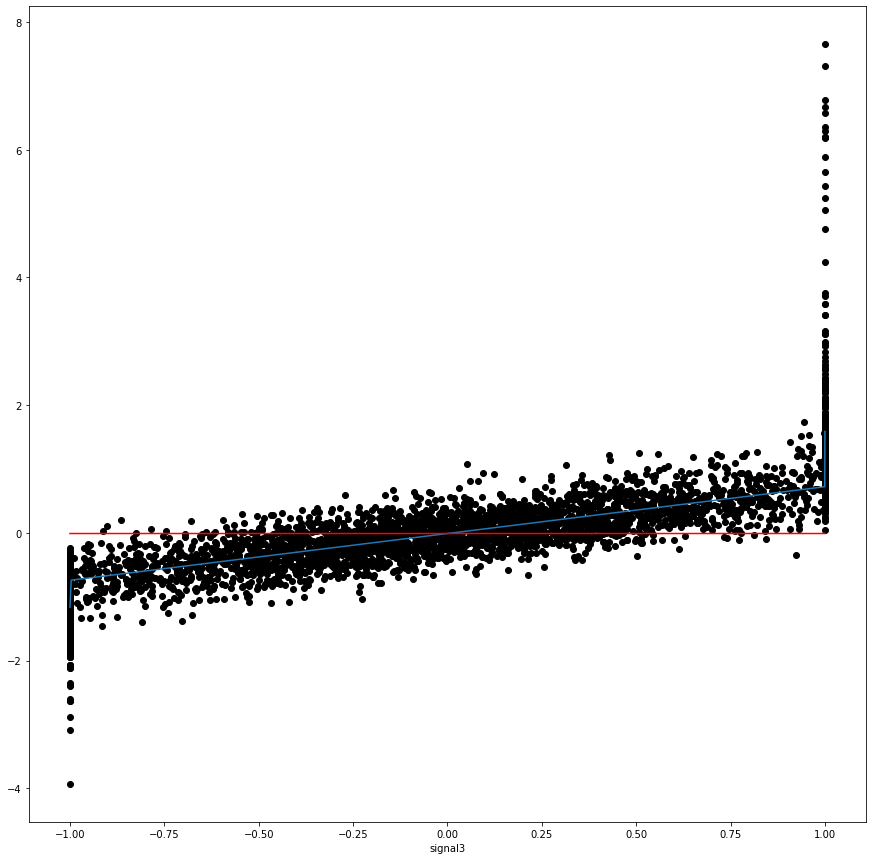

In [43]:
sns.lineplot(x = data[data['binnedmat_bucket']=='2-3 years']['signal3'], y= predictions)
sns.lineplot(x = data[data['binnedmat_bucket']=='2-3 years']['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedmat_bucket']=='2-3 years']['signal3'],data[data['binnedmat_bucket']=='2-3 years']['move_1D'], color = 'black')

In [44]:
x = data[data['binnedmat_bucket']=='5 years'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedmat_bucket']=='5 years']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     3181.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:14:26   Log-Likelihood:                -1222.3
No. Observations:                2671   AIC:                             2453.
Df Residuals:                    2667   BIC:                             2476.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.008      0.135

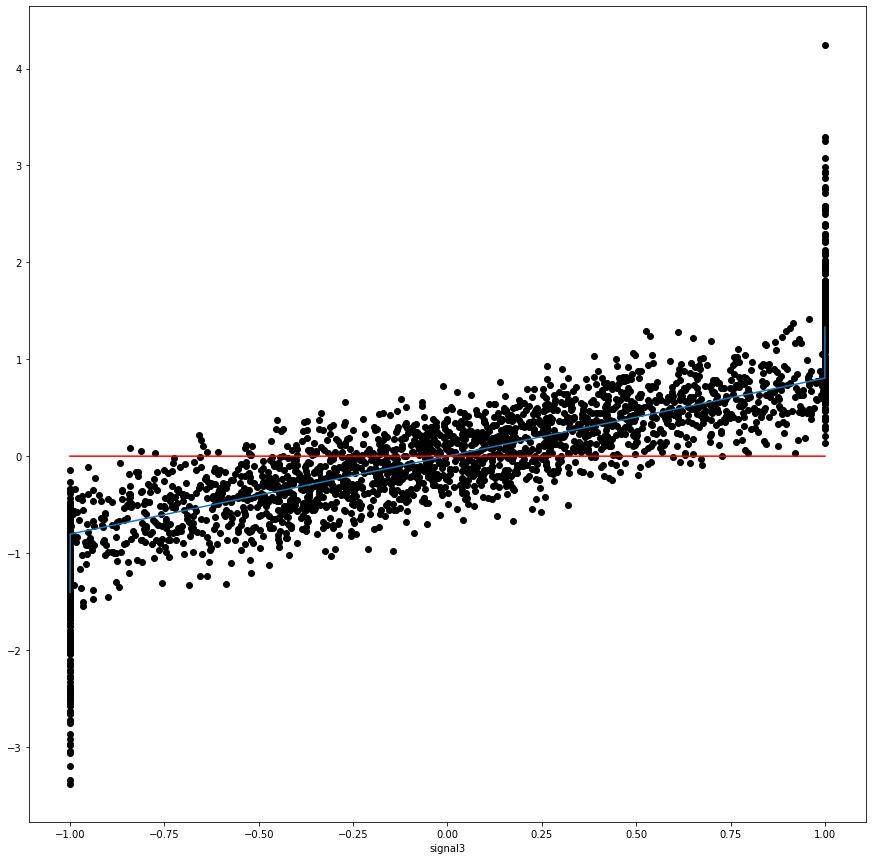

In [45]:
sns.lineplot(x = data[data['binnedmat_bucket']=='5 years']['signal3'], y= predictions)
sns.lineplot(x = data[data['binnedmat_bucket']=='5 years']['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedmat_bucket']=='5 years']['signal3'],data[data['binnedmat_bucket']=='5 years']['move_1D'], color = 'black')

In [47]:
x = data[data['binnedmat_bucket']=='10 years'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedmat_bucket']=='10 years']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     4325.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:16:01   Log-Likelihood:                -2700.0
No. Observations:                3684   AIC:                             5408.
Df Residuals:                    3680   BIC:                             5433.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0087      0.010     -0.875

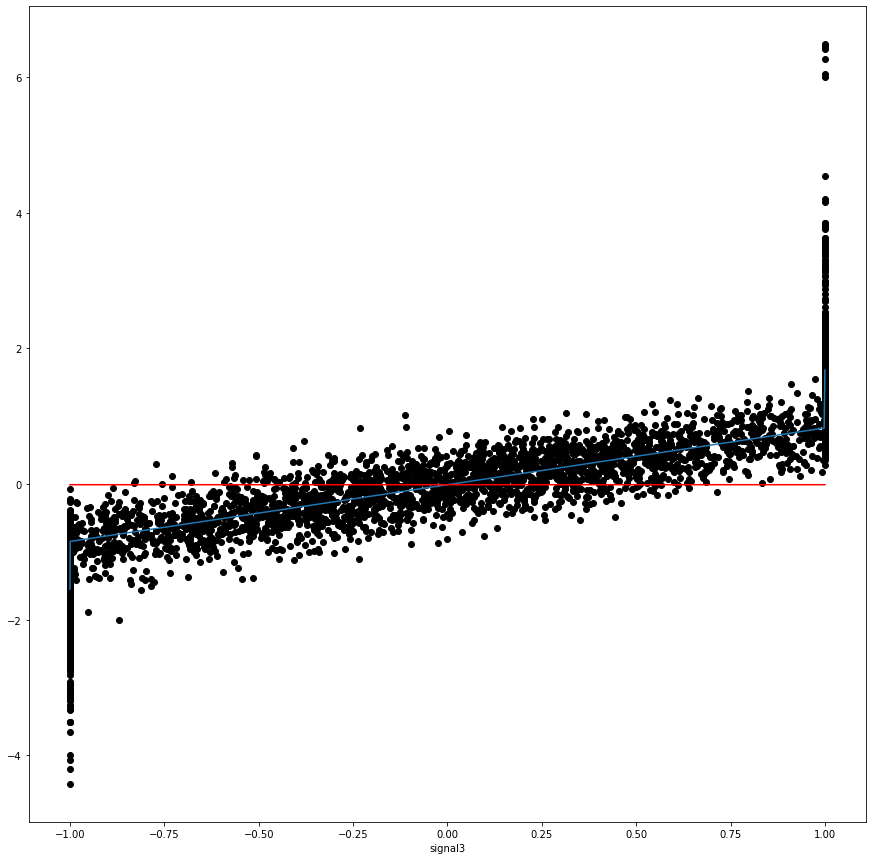

In [48]:
sns.lineplot(x = data[data['binnedmat_bucket']=='10 years']['signal3'], y= predictions)
sns.lineplot(x = data[data['binnedmat_bucket']=='10 years']['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedmat_bucket']=='10 years']['signal3'],data[data['binnedmat_bucket']=='10 years']['move_1D'], color = 'black')

In [46]:
x = data[data['binnedmat_bucket']=='30 years'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedmat_bucket']=='30 years']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     4224.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:15:55   Log-Likelihood:                -1777.1
No. Observations:                2554   AIC:                             3562.
Df Residuals:                    2550   BIC:                             3586.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0201      0.012     -1.623

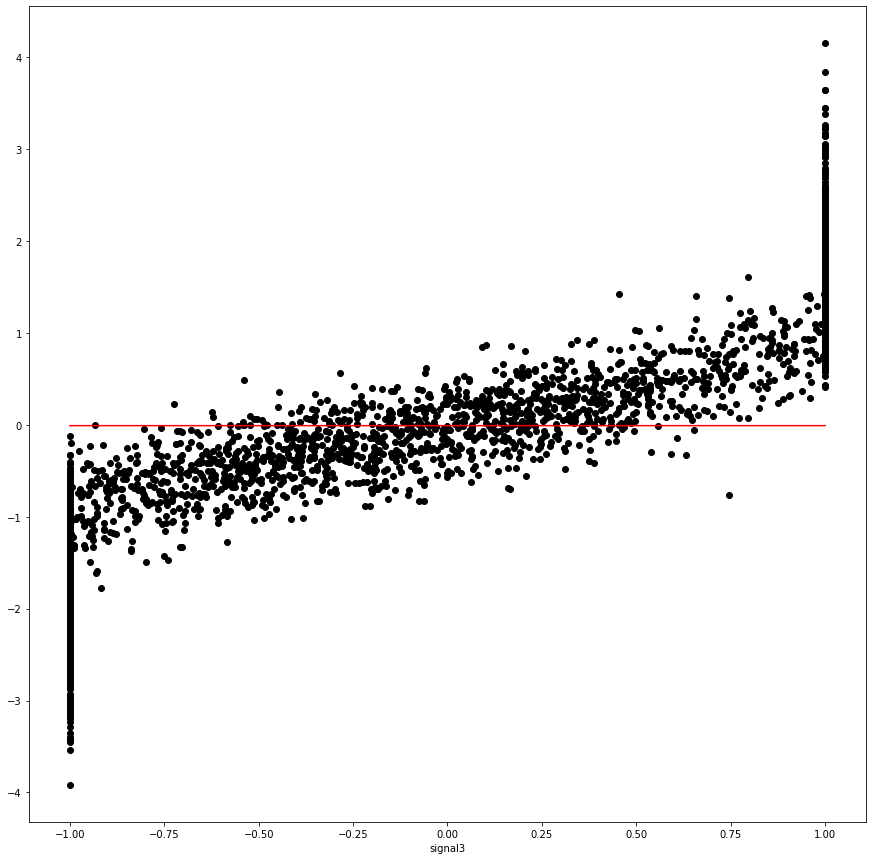

In [49]:
sns.lineplot(x = data[data['binnedmat_bucket']=='30 years']['signal3'], y= predictions)
sns.lineplot(x = data[data['binnedmat_bucket']=='30 years']['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedmat_bucket']=='30 years']['signal3'],data[data['binnedmat_bucket']=='30 years']['move_1D'], color = 'black')

above: r-squared values increase as mat_bucket increases

### Quantity 

In [58]:
x = data[data['binnedquantity_bonds']=='1-12'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedquantity_bonds']=='1-12']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2644.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:25:33   Log-Likelihood:                -1514.9
No. Observations:                2504   AIC:                             3038.
Df Residuals:                    2500   BIC:                             3061.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0168      0.010      1.664

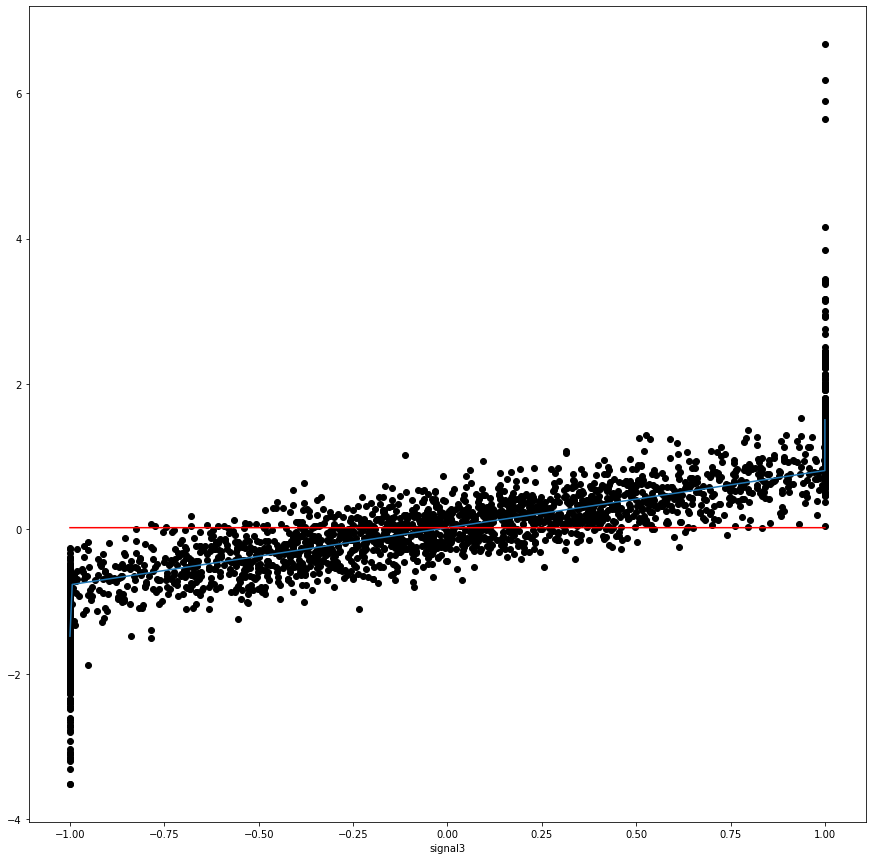

In [60]:
sns.lineplot(x = data[data['binnedquantity_bonds']=='1-12']['signal3'], y= predictions)
sns.lineplot(x = data[data['binnedquantity_bonds']=='1-12']['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedquantity_bonds']=='1-12']['signal3'],data[data['binnedquantity_bonds']=='1-12']['move_1D'], color = 'black')

In [63]:
x = data[data['binnedquantity_bonds']=='50-210'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedquantity_bonds']=='50-210']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     2450.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:28:51   Log-Likelihood:                -1720.6
No. Observations:                2461   AIC:                             3449.
Df Residuals:                    2457   BIC:                             3472.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0201      0.011     -1.768

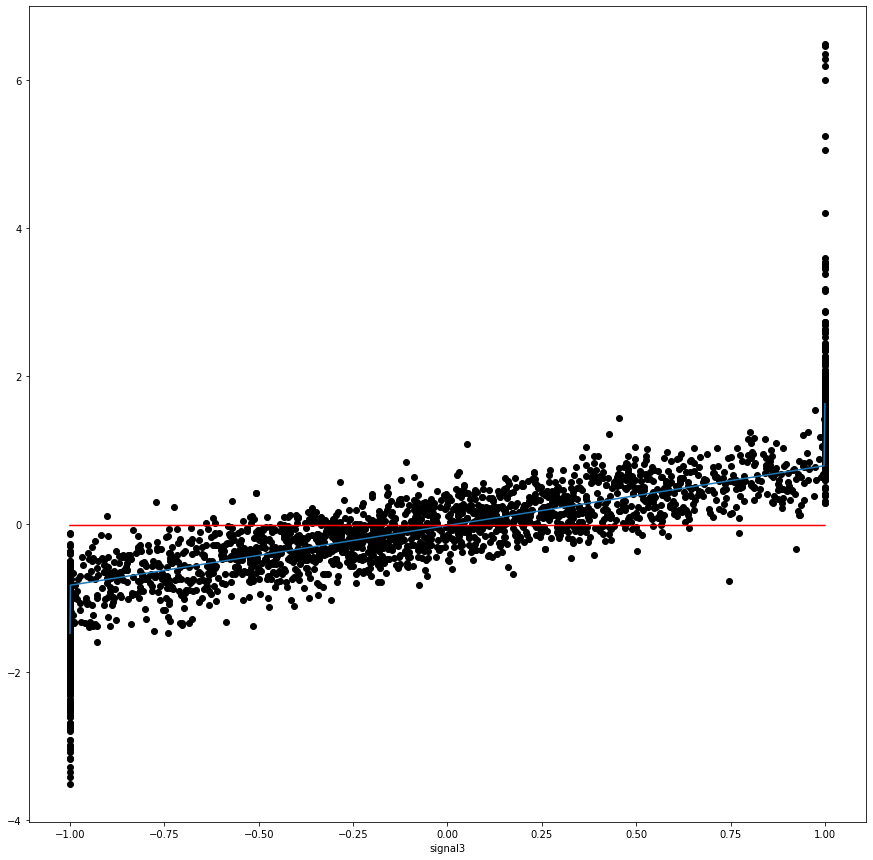

In [64]:
sns.lineplot(x = data[data['binnedquantity_bonds']=='50-210']['signal3'], y= predictions)
sns.lineplot(x = data[data['binnedquantity_bonds']=='50-210']['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedquantity_bonds']=='50-210']['signal3'],data[data['binnedquantity_bonds']=='50-210']['move_1D'], color = 'black')

In [65]:
x = data[data['binnedquantity_bonds']=='600-3000'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['binnedquantity_bonds']=='600-3000']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     2838.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:29:44   Log-Likelihood:                -1912.9
No. Observations:                2496   AIC:                             3834.
Df Residuals:                    2492   BIC:                             3857.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0147      0.013     -1.173

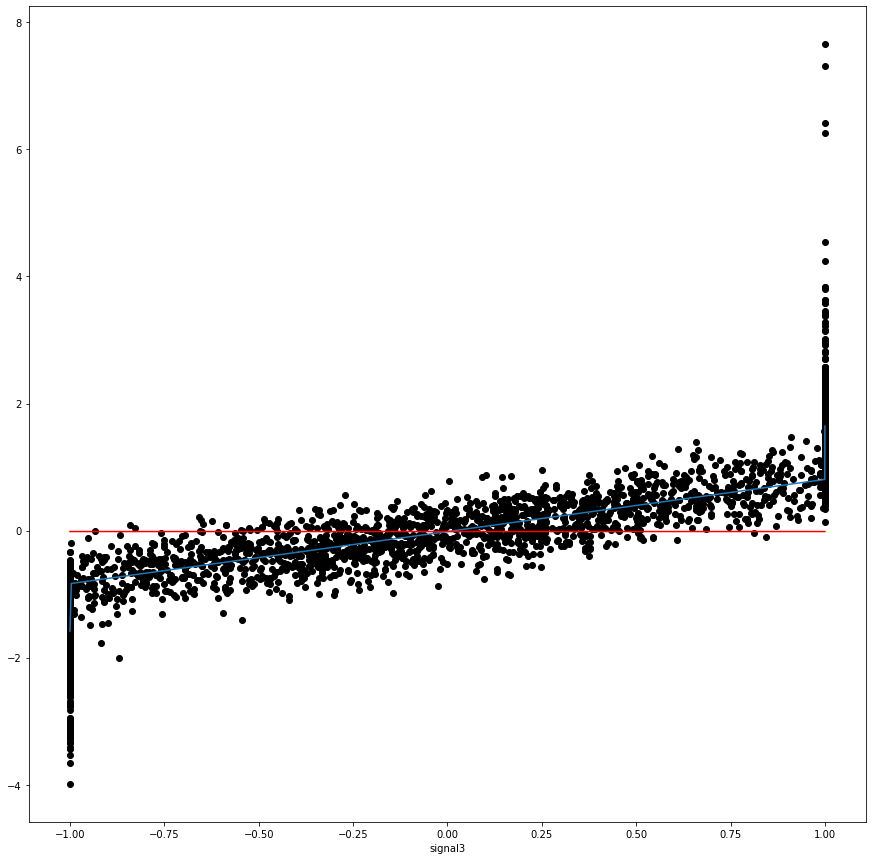

In [66]:
sns.lineplot(x = data[data['binnedquantity_bonds']=='600-3000']['signal3'], y= predictions)
sns.lineplot(x = data[data['binnedquantity_bonds']=='600-3000']['signal3'], y=model.params[0], color = 'red')
plt.scatter( data[data['binnedquantity_bonds']=='600-3000']['signal3'],data[data['binnedquantity_bonds']=='600-3000']['move_1D'], color = 'black')

see above: quantity seems to have little to no change in bins and therefore should not be a highly weighted factor in helping fine tune signal3 to predict move_1D

# Sector

In [72]:
x = data[data['industrySector']=='Consumer Cyclical'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['industrySector']=='Consumer Cyclical']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1042.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          5.73e-322
Time:                        12:06:49   Log-Likelihood:                -770.30
No. Observations:                1112   AIC:                             1549.
Df Residuals:                    1108   BIC:                             1569.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0038      0.017     -0.226

In [73]:
x = data[data['industrySector']=='Basic Materials'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['industrySector']=='Basic Materials']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     809.8
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          4.52e-196
Time:                        12:07:11   Log-Likelihood:                -377.06
No. Observations:                 527   AIC:                             762.1
Df Residuals:                     523   BIC:                             779.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0026      0.027      0.098

In [75]:
x = data[data['industrySector']=='Technology'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['industrySector']=='Technology']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2033.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:07:51   Log-Likelihood:                -686.80
No. Observations:                1619   AIC:                             1382.
Df Residuals:                    1615   BIC:                             1403.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0007      0.010     -0.069

In [76]:
x = data[data['industrySector']=='Industrial'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['industrySector']=='Industrial']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     1510.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:08:16   Log-Likelihood:                -729.72
No. Observations:                1471   AIC:                             1467.
Df Residuals:                    1467   BIC:                             1489.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0140      0.012     -1.201

In [93]:
x = data[data['industrySector']=='Financial'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['industrySector']=='Financial']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1274.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:23:25   Log-Likelihood:                -1665.2
No. Observations:                2442   AIC:                             3338.
Df Residuals:                    2438   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0095      0.010     -0.913

In [94]:
x = data[data['industrySector']=='Consumer Non-cyclical'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['industrySector']=='Consumer Non-cyclical']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     6244.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:25:25   Log-Likelihood:                -3273.8
No. Observations:                4341   AIC:                             6556.
Df Residuals:                    4337   BIC:                             6581.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0105      0.010     -1.069

In [95]:
x = data[data['industrySector']=='Utilities'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['industrySector']=='Utilities']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     708.1
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          2.33e-202
Time:                        12:27:09   Log-Likelihood:                -360.37
No. Observations:                 641   AIC:                             728.7
Df Residuals:                     637   BIC:                             746.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0050      0.019     -0.261

In [96]:
x = data[data['industrySector']=='Energy'][['signal3', 'sig3equal1', 'sig3equalneg1']]
y = data[data['industrySector']=='Energy']['move_1D']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                move_1D   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     412.4
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          3.18e-113
Time:                        12:28:58   Log-Likelihood:                -85.583
No. Observations:                 346   AIC:                             179.2
Df Residuals:                     342   BIC:                             194.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0251      0.018     -1.392

# Playing around

In [48]:
set.seed()

AttributeError: type object 'set' has no attribute 'seed'

In [ ]:
set.seed(2018)
quick_RF <- randomForest(x=all[1:1460,-79], y=all$SalePrice[1:1460], ntree=100,importance=TRUE)
imp_RF <- importance(quick_RF)
imp_DF <- data.frame(Variables = row.names(imp_RF), MSE = imp_RF[,1])
imp_DF <- imp_DF[order(imp_DF$MSE, decreasing = TRUE),]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

(12499,)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Alpha:1.00, R2:0.00, MSE:0.94, RMSE:0.97


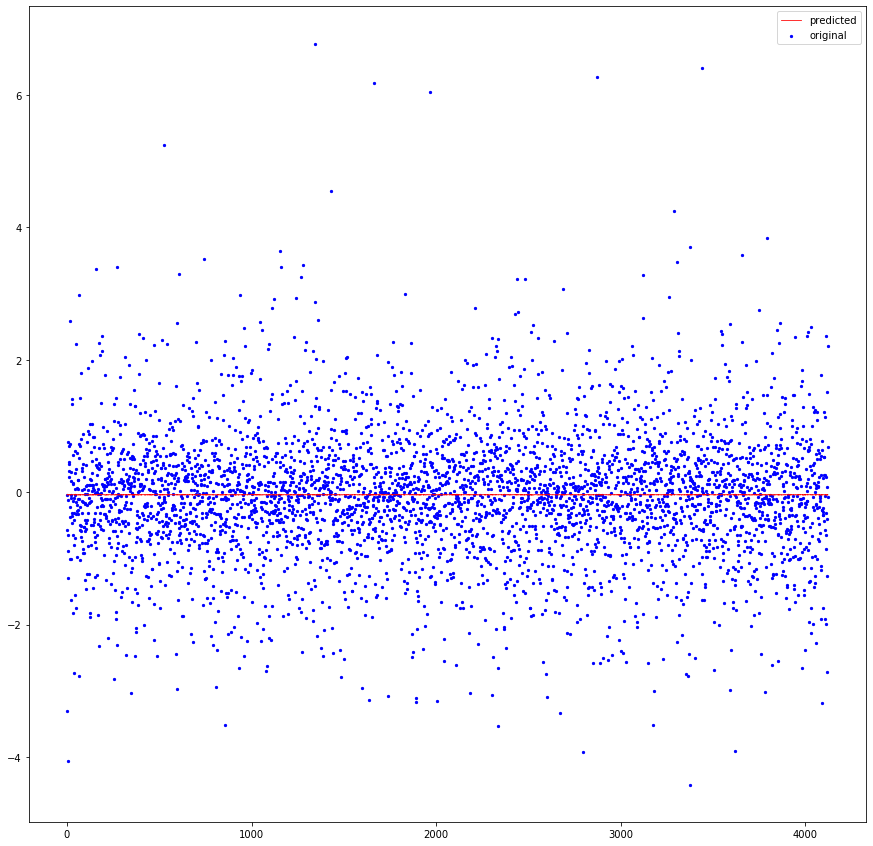

In [87]:
from sklearn.linear_model import Lasso, LassoCV


x, y = (data[['binnedliq_score', 'bondlength', 'quantity_bonds','signal3', 'sig3equal1', 'sig3equalneg1']], data[['move_1D']])

model = Lasso().fit(x_train, y_train)
print(model)
score = model.score(x_train, y_train)
ypred = model.predict(x_test)
mse = mean_squared_error(y_test,ypred)
print("Alpha:{0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(model.alpha, score, mse, np.sqrt(mse)))

x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# alphas = [-1,-0.50,0, 0.5, 1]
# lassocv = LassoCV(alphas=alphas, cv=5).fit(x,y)
# print(lassocv)
# score = lassocv.score(x,y)
# ypred = lassocv.predict(x_test)
# mse = mean_squared_error(y_test,ypred)
# print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(lassocv.alpha_, score, mse, np.sqrt(mse)))

# x_ax = range(len(x_test))
# plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
# plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
# plt.legend()
# plt.show() 

the values of the response variable to be categorical or discrete such as: “Yes” or “No”, “True” or “False”, 0 or 1. 

In [106]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
# Values for Predictor and Response variables
X =data[['binnedliq_score', 'bondlength', 'quantity_bonds','signal3', 'sig3equal1', 'sig3equalneg1']]
Y= data['move_1D']
# Create label encoder object
labels = preprocessing.LabelEncoder()
# Convert continous y values to categorical
Y_cat = labels.fit_transform(Y)
print(Y_cat)

[7026 7243 7243 ... 8129 6563 2050]


In [112]:
data['sig3equal1'].size

12499

In [107]:
# X =data[['binnedliq_score', 'bondlength', 'quantity_bonds','signal3', 'sig3equal1', 'sig3equalneg1']]
# Y= data['move_1D']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =  0.25,random_state = 0) 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_cat)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [9374, 12499]